**This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.**

1. 'application_data.csv'
It contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2. 'previous_application.csv'
It contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

# **Importing the libraries**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# **Path of dataset**

In [108]:
#reading the data of application_data
# application_data=pd.read_csv(r"C:\Users\admin2\Downloads\application_data.csv")
application_data=pd.read_csv(r"C:\Users\Ammar\Google Drive\Sync\TYcollege\lordai\Major Project\final\application_data.csv")


In [109]:
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#reading the path of previous_application
# previous_application=pd.read_csv(r"C:\Users\admin2\Downloads\previous_application.csv")
previous_application=pd.read_csv(r"C:\Users\Ammar\Google Drive\Sync\TYcollege\lordai\Major Project\final\previous_application.csv")

In [111]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [112]:
# Top 5 rows:

application_data.head()

# The header row looks fine

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Top 5 rows:

previous_application.head()

# The header row looks fine

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# **Checking the numeric variables of the dataframes**

In [114]:
# info of the application_data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [115]:
# info of the previous_application
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Shape of Both Datasets**

In [116]:
#shape of the application_data
print("application_data:-",application_data.shape)

#shape of the previous_application
print("previous_application:-",previous_application.shape)

application_data:- (307511, 122)
previous_application:- (1670214, 37)


**Unique Values in Both Datasets**

In [117]:
#finding the common or unique values from both of the dataset
addition=[]
common=[]

for col in application_data.columns:
    if col not in previous_application.columns:
        addition.append(col)
    else:
        common.append(col)
print(len(addition))
print(len(common))
print(common)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


**Column Name [application_data]**

In [118]:
#print the list if column names of dataset application_data
for col in application_data.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

**Column Name [previous_application]**

In [119]:
#print the list if column names of dataset previous_application
for col in previous_application.columns:
    print(col)

SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


**Length of Both Datasets**

In [120]:
#lenthe of application_data
print(len(application_data))

#lenthe of previous_application
print(len(previous_application))

307511
1670214


**Merge both the datasets using left join**

merge() method updates the content of two DataFrame by merging them together, using the specified method(s).

Use the parameters to control which values to keep and which to replace

dataframe.merge(right, how, on, left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate)

In [121]:
#Merged both dataset application_data & previous_application from left side
merged_data=application_data.merge(previous_application, how='left')
print('Result Left Join:\n',merged_data)

Result Left Join:
         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y

In [122]:
print("merged_data:-",merged_data.shape)

merged_data:- (307511, 151)


The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.

In [123]:
# Checking merged dataframe numerical columns statistics
merged_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,0.0,4.000000,4.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,NaN,-147.000000,-1.0,24.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,NaN,142.886902,0.0,29.393877,NaN,NaN,NaN,NaN,NaN,NaN
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,NaN,-294.000000,-1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,NaN,-257.250000,-1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,NaN,-136.500000,-1.0,18.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,NaN,-26.250000,-1.0,42.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,NaN,-21.000000,-1.0,60.000000,NaN,NaN,NaN,NaN,NaN,NaN


**Handle missing data by deciding whether to remove it or replace it**

round() function is used to round a DataFrame to a variable number of decimal places. This function provides the flexibility to round different columns by different places.

Dividing the sum of missing values by the total number of rows gives the proportion of missing values for each column.

Multiplying by 100 converts the proportion to a percentage.

round(..., 2) rounds the result to 2 decimal places.

 the percentage of missing values in each column of the DataFrame merged_data, rounded to 2 decimal places.

In [124]:
#checking up the total number of missing values and round it by 2 
round((merged_data.isnull().sum()/merged_data.shape[0])*100,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                             ...  
DAYS_FIRST_DUE               100.0
DAYS_LAST_DUE_1ST_VERSION    100.0
DAYS_LAST_DUE                100.0
DAYS_TERMINATION             100.0
NFLAG_INSURED_ON_APPROVAL    100.0
Length: 151, dtype: float64

**Percentage of Missing values**

only keep the values that are greater than 50.0. This filters out the columns with more than 50% missing values.

calculates the number of columns with more than 50% missing values and returns the result.

In [125]:
#checking for coloums having greater than 50% null value

null_values=merged_data.isnull().sum()/len(merged_data)*100
null_values=null_values[null_values.values>50.0]
print(null_values)
len(null_values)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
APARTMENTS_AVG                50.749729
BASEMENTAREA_AVG              58.515956
YEARS_BUILD_AVG               66.497784
                                ...    
DAYS_FIRST_DUE               100.000000
DAYS_LAST_DUE_1ST_VERSION    100.000000
DAYS_LAST_DUE                100.000000
DAYS_TERMINATION             100.000000
NFLAG_INSURED_ON_APPROVAL    100.000000
Length: 70, dtype: float64


70

In [126]:
# getting columns with null values greater than 0% and less than or equal to 40%:

Outlier=merged_data.columns[((merged_data.isnull().sum()/len(merged_data)*100) <= 40) & ((merged_data.isnull().sum()/len(merged_data)*100) > 0)]
print(Outlier)
print(len(Outlier))

# We have 18 columns where null values is greater than 0% and less than or equal to 40%

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
18


**Handling Outlier values and NULL values**

# AMT_ANNUITY

we have 18 columns with null values and some Outlier of 0% to 10% range

In [127]:
merged_data['AMT_ANNUITY'].isnull().sum()

12

AMT_ANNUITY - Monthly payments (including interests) at application time

AMT_ANNUITY is a numeric column so we can perform outliers on it.

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


<AxesSubplot: ylabel='AMT_ANNUITY'>

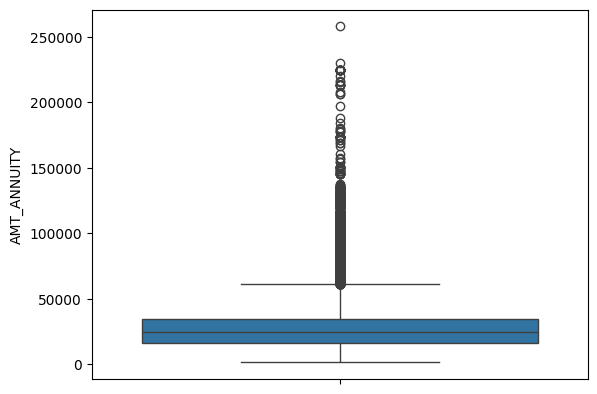

In [128]:
print(merged_data['AMT_ANNUITY'].describe())

#box plot for checking outliers of AMT_ANNUITY column
sns.boxplot(merged_data['AMT_ANNUITY'])

**here by looking at boxplot we can clearly see that**


Max of the values in box plot containing outliers 

for performing imputation we can use median  24903

# AMT_GOODS_PRICE

AMT_GOODS_PRICE- Price of the good (cellphone, computer, microwave...) purchased

AMT_GOODS_PRICE is numeric column so we can perform outliers on it.

In [129]:
merged_data['AMT_GOODS_PRICE'].isnull().sum()

278

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


<AxesSubplot: ylabel='AMT_GOODS_PRICE'>

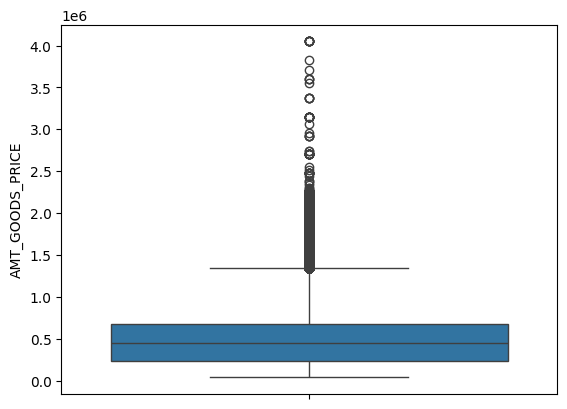

In [130]:
print(merged_data['AMT_GOODS_PRICE'].describe())
sns.boxplot(merged_data['AMT_GOODS_PRICE'])

**here by looking at boxplot we can clearly see that**


Max of the values in box plot containing outliers 

for performing imputation we can use median  4.500000

# NAME_TYPE_SUITE

NAME_TYPE_SUITE- who was accompanying client when he was applying for the loan

In [131]:
merged_data['NAME_TYPE_SUITE'].isnull().sum()

1292

NAME_TYPE_SUITE Because of categorical column we cant perfrom boxplot so we are doing value_counts

In [132]:
merged_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

the null value is 1292 and 
the max value of Unaccompanied 248526 it seems that Unaccompanied is not null

We can impute the mοde value 'Unaccοmpanied' in place οf missing values

# OCCUPATION_TYPE

OCCUPATION_TYPE- what kind of occupation does the client have and employers origanization type

In [133]:
merged_data['OCCUPATION_TYPE'].isnull().sum()

96391

OCCUPATION_TYPE Because of categorical column we cant perfrom boxplot so we are doing value_counts

In [134]:
merged_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Maximum number of people who applied for the loan are Laborers and Sales staffs

we cannot impute big number of categorical values it well get a chances of imbalances

# CNT_FAM_MEMBERS

CNT_FAM_MEMBERS - family status of the client / number of children / number of family members

In [135]:
merged_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [136]:
merged_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


<AxesSubplot: ylabel='CNT_FAM_MEMBERS'>

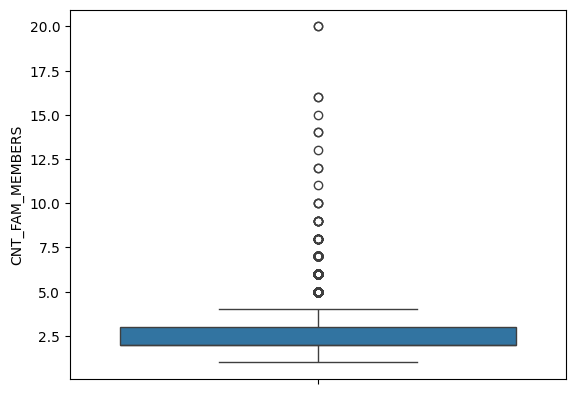

In [137]:
print(merged_data['CNT_FAM_MEMBERS'].describe())
sns.boxplot(merged_data['CNT_FAM_MEMBERS'])

**here by looking at boxplot we can clearly see that**

here also max of the value are having outlier

by value_counts we have seen number of family members 

we have just 2 row of null or missing values so we can drop it 
it would not make big differences

# EXT_SOURCE_2

AMT_GOODS_PRICE is numeric column so we can perform outliers on it.

In [138]:
merged_data['EXT_SOURCE_2'].isnull().sum()

660

EXT_SOURCE_2- normalized scores from external data source

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


<AxesSubplot: ylabel='EXT_SOURCE_2'>

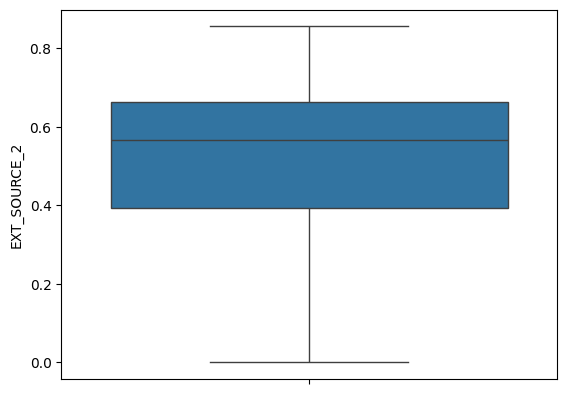

In [139]:
print(merged_data['EXT_SOURCE_2'].describe())
sns.boxplot(merged_data['EXT_SOURCE_2'])

**here by looking at boxplot we can clearly see that**

EXT_SOURCE_2 Good thing there is no outliers 

We can impute the missing values using mean of the column.

# EXT_SOURCE_3

In [140]:
merged_data['EXT_SOURCE_3'].isnull().sum()

60965

EXT_SOURCE_3 is numeric column so we can perform outliers on it.

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


<AxesSubplot: ylabel='EXT_SOURCE_3'>

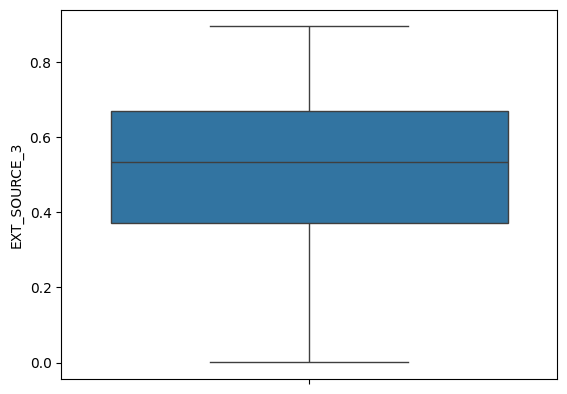

In [141]:
print(merged_data['EXT_SOURCE_3'].describe())
sns.boxplot(merged_data['EXT_SOURCE_3'])

**here by looking at boxplot we can clearly see that**

EXT_SOURCE_3 Good thing there is no outliers 

there are high percentage of missing values we can use mean for imputing

# OBS_30_CNT_SOCIAL_CIRCLE / DEF_30_CNT_SOCIAL_CIRCLE

nb. of observations of client's social surroundings observed 30 days past due and how many defaulted

In [142]:
merged_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [143]:
merged_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


<AxesSubplot: ylabel='OBS_30_CNT_SOCIAL_CIRCLE'>

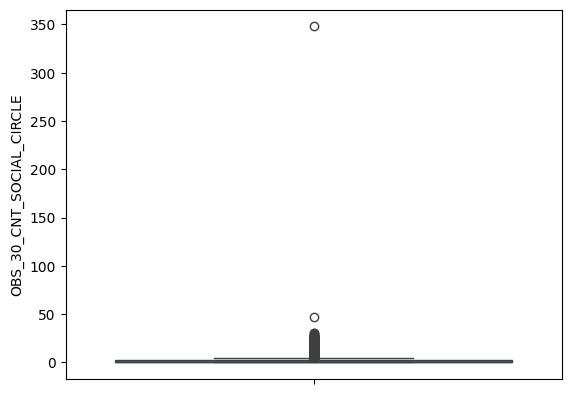

In [144]:
print(merged_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe())
sns.boxplot(merged_data['OBS_30_CNT_SOCIAL_CIRCLE'])

**here by looking at boxplot we can clearly see that**

there are two outliers on position 50 and position 350

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


<AxesSubplot: ylabel='DEF_30_CNT_SOCIAL_CIRCLE'>

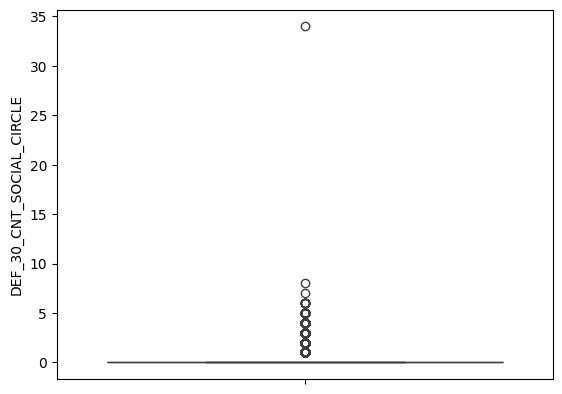

In [145]:
print(merged_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe())
sns.boxplot(merged_data['DEF_30_CNT_SOCIAL_CIRCLE'])

# OBS_60_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE

nb. of observations of client's social surroundings observed 60 days past due and how many defaulted

In [146]:
merged_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [147]:
merged_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


<AxesSubplot: ylabel='OBS_60_CNT_SOCIAL_CIRCLE'>

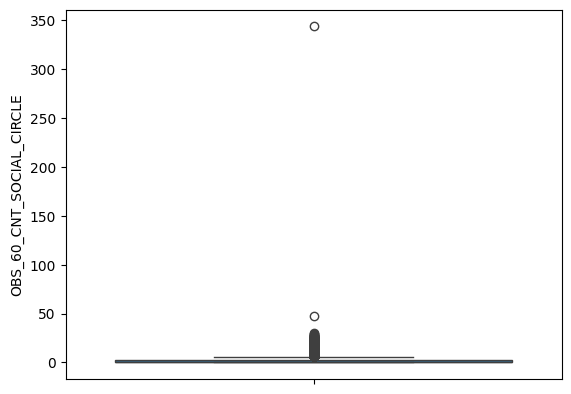

In [148]:
print(merged_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
sns.boxplot(merged_data['OBS_60_CNT_SOCIAL_CIRCLE'])

**here by looking at boxplot we can clearly see that**

here also there are two outliers on position 50 and position 350

# DEF_60_CNT_SOCIAL_CIRCLE

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


<AxesSubplot: ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

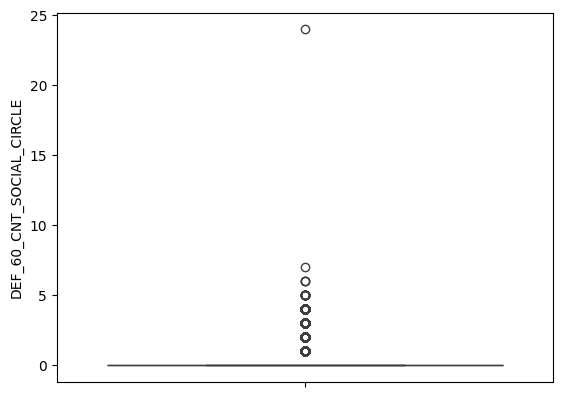

In [149]:
print(merged_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe())
sns.boxplot(merged_data['DEF_60_CNT_SOCIAL_CIRCLE'])

# DAYS_LAST_PHONE_CHANGE

days since last phone change

In [150]:
print(merged_data['DAYS_LAST_PHONE_CHANGE'].value_counts())

DAYS_LAST_PHONE_CHANGE
 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: count, Length: 3773, dtype: int64


count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


<AxesSubplot: ylabel='DAYS_LAST_PHONE_CHANGE'>

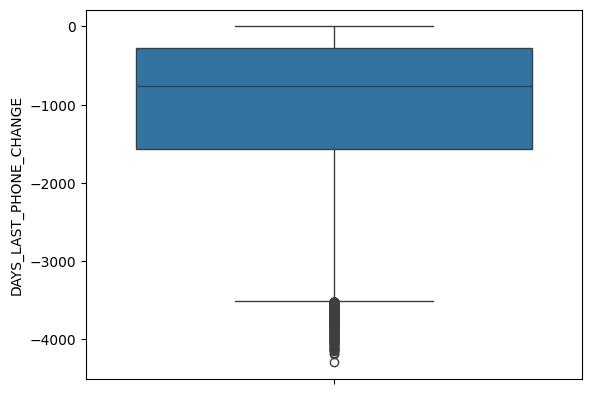

In [151]:
print(merged_data['DAYS_LAST_PHONE_CHANGE'].describe())
sns.boxplot(merged_data['DAYS_LAST_PHONE_CHANGE'])

In [152]:
merged_data['DAYS_LAST_PHONE_CHANGE']=merged_data['DAYS_LAST_PHONE_CHANGE'].abs()
merged_data['DAYS_LAST_PHONE_CHANGE']

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

After converting negative values to positive values

count    307510.000000
mean          2.637969
std           2.265229
min           0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


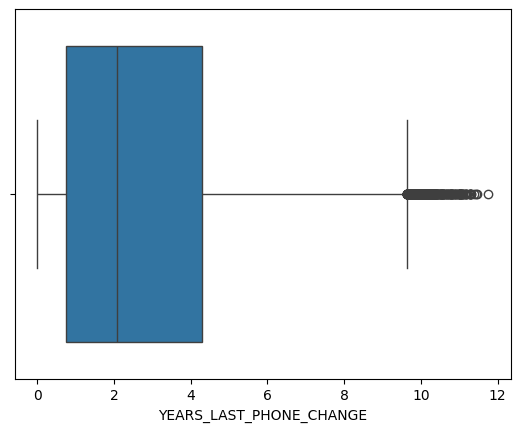

In [153]:
# Alternative way to create the 'DAYS_LAST_PHONE_CHANGE' column
merged_data['YEARS_LAST_PHONE_CHANGE'] = merged_data['DAYS_LAST_PHONE_CHANGE'].div(365)

# Print summary statistics of the 'YEARS_BIRTH' column
print(merged_data['YEARS_LAST_PHONE_CHANGE'].describe())

# Create a box plot using the 'YEARS_BIRTH' column
sns.boxplot(data=merged_data, x='YEARS_LAST_PHONE_CHANGE')
plt.show()


**here by looking at boxplot we can clearly see that**

there are some outliers near to 12 

most of the people who change there LAST_PHONE_CHANGE fall in the range 1 to 5

# DAYS_BIRTH

**DAYS_BIRTH: Clients**- age in days at the time of application

In [154]:
merged_data['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: count, Length: 17460, dtype: int64

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


<AxesSubplot: ylabel='DAYS_BIRTH'>

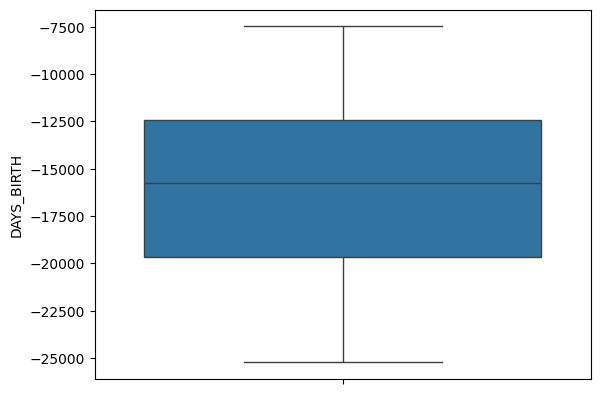

In [155]:
print(merged_data['DAYS_BIRTH'].describe())
sns.boxplot(merged_data['DAYS_BIRTH'])

In [156]:
merged_data['DAYS_BIRTH']=merged_data['DAYS_BIRTH'].abs()
merged_data['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64


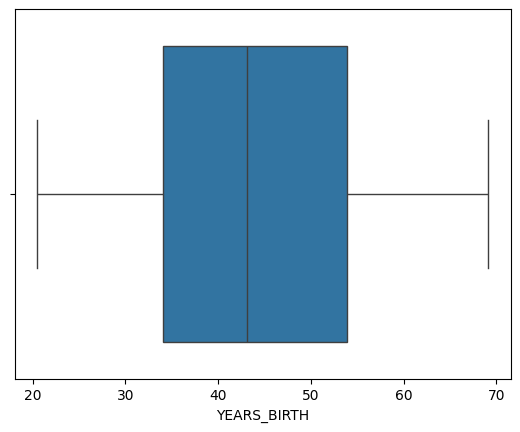

In [157]:
# Alternative way to create the 'DAYS_BIRTH' column
merged_data['YEARS_BIRTH'] = merged_data['DAYS_BIRTH'].div(365)

# Print summary statistics of the 'YEARS_BIRTH' column
print(merged_data['YEARS_BIRTH'].describe())

# Create a box plot using the 'YEARS_BIRTH' column
sns.boxplot(data=merged_data, x='YEARS_BIRTH')
plt.show()


**here by looking at boxplot we can clearly see that**

There are no outliers

The customer who apply for the loan is in the age group between 35 to 55

# DAYS_EMPLOYED

**DAYS_EMPLOYED**: How many days before the application the person started its current employment

In [158]:
merged_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [159]:
merged_data['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [160]:
merged_data['DAYS_EMPLOYED']=merged_data['DAYS_EMPLOYED'].abs()
merged_data['DAYS_EMPLOYED']

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64


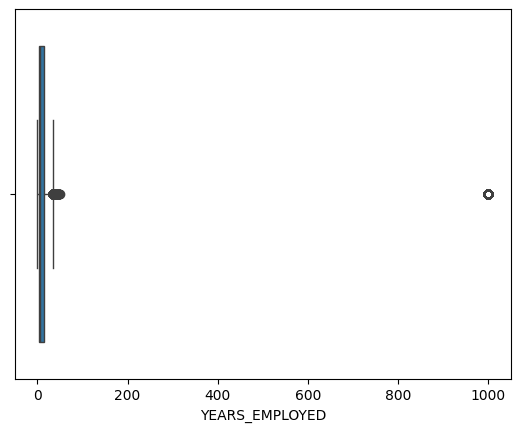

In [161]:
# Alternative way to create the 'DAYS_EMPLOYED' column
merged_data['YEARS_EMPLOYED'] = merged_data['DAYS_EMPLOYED'].div(365)

# Print summary statistics of the 'YEARS_BIRTH' column
print(merged_data['YEARS_EMPLOYED'].describe())

# Create a box plot using the 'YEARS_BIRTH' column
sns.boxplot(data=merged_data, x='YEARS_EMPLOYED')
plt.show()


# DAYS_REGISTRATION

**DAYS_REGISTRATION** :- how many days before the application did client change his registration

In [162]:
merged_data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [163]:
merged_data['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.0    113
-7.0     98
-6.0     96
-4.0     92
-2.0     92
Name: count, dtype: int64

In [164]:
merged_data['DAYS_REGISTRATION']=merged_data['DAYS_REGISTRATION'].abs()
merged_data['DAYS_REGISTRATION']

0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307506    8456.0
307507    4388.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: YEARS_REGISTRATION, dtype: float64


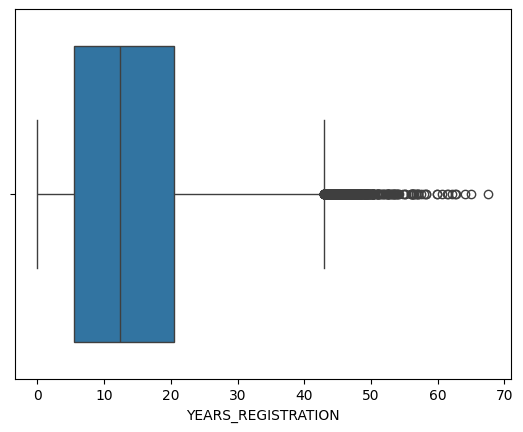

In [165]:
# Alternative way to create the 'DAYS_REGISTRATION' column
merged_data['YEARS_REGISTRATION'] = merged_data['DAYS_REGISTRATION'].div(365)

# Print summary statistics of the 'YEARS_BIRTH' column
print(merged_data['YEARS_REGISTRATION'].describe())

# Create a box plot using the 'YEARS_BIRTH' column
sns.boxplot(data=merged_data, x='YEARS_REGISTRATION')
plt.show()


**here by looking at boxplot we can clearly see that**

There are some outliers 

Customer in year range in between 5 to 20

# DAYS_ID_PUBLISH

**DAYS_ID_PUBLISH**:- how many days before the application did client change the identity document

In [166]:
merged_data['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [167]:
merged_data['DAYS_ID_PUBLISH'].value_counts()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: count, Length: 6168, dtype: int64

In [168]:
merged_data['DAYS_ID_PUBLISH']=merged_data['DAYS_ID_PUBLISH'].abs()
merged_data['DAYS_ID_PUBLISH']

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: YEARS_ID_PUBLISH, dtype: float64


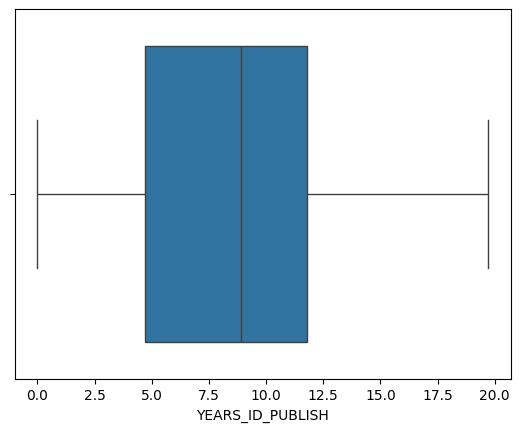

In [169]:
# Alternative way to create the 'DAYS_ID_PUBLISH' column
merged_data['YEARS_ID_PUBLISH'] = merged_data['DAYS_ID_PUBLISH'].div(365)

# Print summary statistics of the 'YEARS_BIRTH' column
print(merged_data['YEARS_ID_PUBLISH'].describe())

# Create a box plot using the 'YEARS_BIRTH' column
sns.boxplot(data=merged_data, x='YEARS_ID_PUBLISH')
plt.show()


**here by looking at boxplot we can clearly see that**

There is no outliers

The application did client change the identity is in the range of 5 to 11 years

# DAYS_LAST_PHONE_CHANGE

**DAYS_LAST_PHONE_CHANGE**:- days since last phone change

In [170]:
merged_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [171]:
merged_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

DAYS_LAST_PHONE_CHANGE
0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
4051.0        1
3593.0        1
3622.0        1
3570.0        1
3538.0        1
Name: count, Length: 3773, dtype: int64

In [172]:
merged_data['DAYS_LAST_PHONE_CHANGE']=merged_data['DAYS_LAST_PHONE_CHANGE'].abs()
merged_data['DAYS_LAST_PHONE_CHANGE']

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

count    307510.000000
mean          2.637969
std           2.265229
min           0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: YEAR_LAST_PHONE_CHANGE, dtype: float64


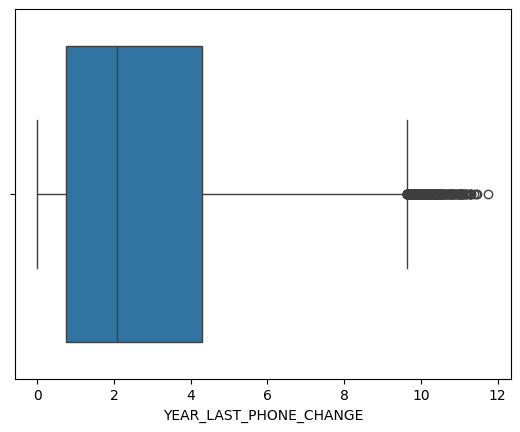

In [173]:
# Alternative way to create the 'DAYS_LAST_PHONE_CHANGE' column
merged_data['YEAR_LAST_PHONE_CHANGE'] = merged_data['DAYS_LAST_PHONE_CHANGE'].div(365)

# Print summary statistics of the 'YEARS_BIRTH' column
print(merged_data['YEAR_LAST_PHONE_CHANGE'].describe())

# Create a box plot using the 'YEARS_BIRTH' column
sns.boxplot(data=merged_data, x='YEAR_LAST_PHONE_CHANGE')
plt.show()


**here by looking at boxplot we can clearly see that**

There is a outlier at 11

applicants who change there phone is in the rage of 1 to 4 years

# AMT_REQ_CREDIT_BUREAU_tag with tag in [HOUR, DAY, WEEK, MON, QRT, YEAR]: number of enquiries to Credit Bureau about the client one hour (day, week, ...) before application

Cοlumns with numbers οf enquiries tο Credit Bureau cοlumns are:

1. AMT_REQ_CREDIT_BUREAU_YEAR,
2. AMT_REQ_CREDIT_BUREAU_QRT,
3. AMT3. _REQ_CREDIT_BUREAU_MON,
4. AMT_RE4. Q_CREDIT_BUREAU_WEEK,
5. AMT_REQ_CREDIT_BUREAU_DAY,
6. AMT_REQ_CREDIT_BUREAU_HOUR

In [174]:
merged_data[['AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [175]:
merged_data[['AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
dtype: int64

In [176]:
print("merged_data:-",merged_data.shape)

merged_data:- (307511, 157)


In [177]:
merged_data[['AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


<AxesSubplot: ylabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

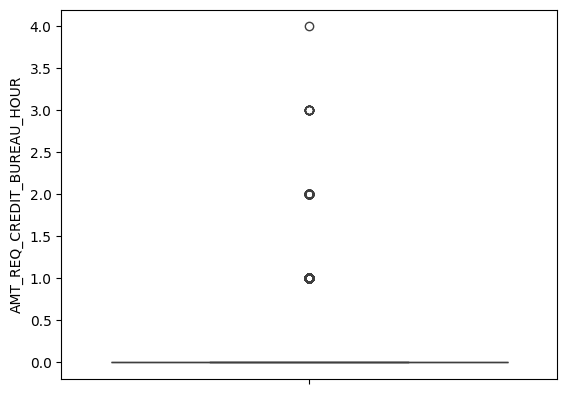

In [178]:
print(merged_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
sns.boxplot(merged_data['AMT_REQ_CREDIT_BUREAU_HOUR'])

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


<AxesSubplot: ylabel='AMT_REQ_CREDIT_BUREAU_DAY'>

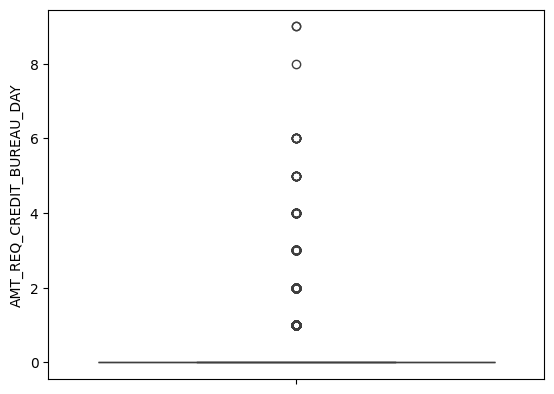

In [179]:
print(merged_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe())
sns.boxplot(merged_data['AMT_REQ_CREDIT_BUREAU_DAY'])

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


<AxesSubplot: ylabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

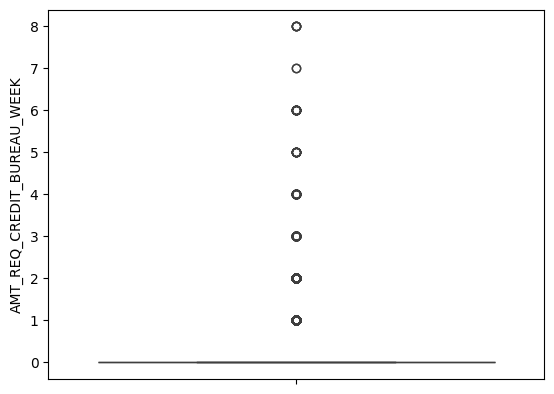

In [180]:
print(merged_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())
sns.boxplot(merged_data['AMT_REQ_CREDIT_BUREAU_WEEK'])

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


<AxesSubplot: ylabel='AMT_REQ_CREDIT_BUREAU_MON'>

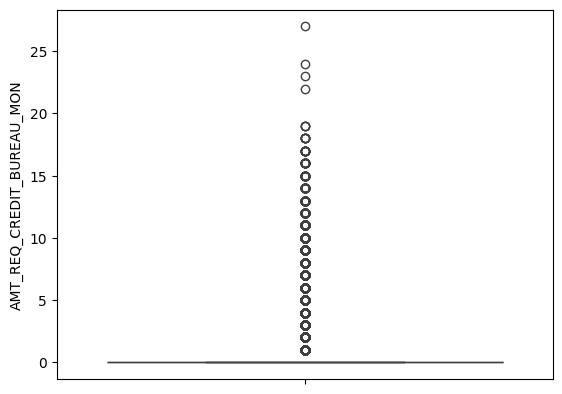

In [181]:
print(merged_data['AMT_REQ_CREDIT_BUREAU_MON'].describe())
sns.boxplot(merged_data['AMT_REQ_CREDIT_BUREAU_MON'])

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


<AxesSubplot: ylabel='AMT_REQ_CREDIT_BUREAU_QRT'>

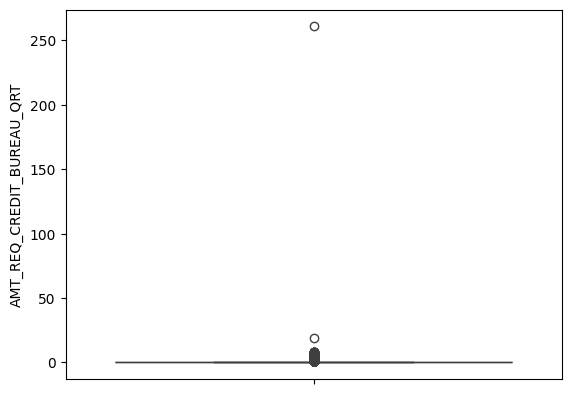

In [182]:
print(merged_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe())
sns.boxplot(merged_data['AMT_REQ_CREDIT_BUREAU_QRT'])

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


<AxesSubplot: ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

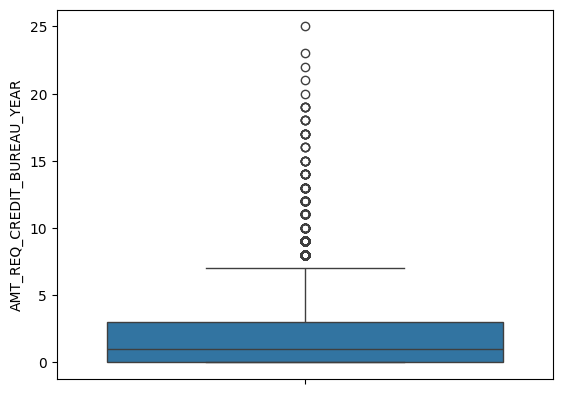

In [183]:
print(merged_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())
sns.boxplot(merged_data['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [184]:
merged_data.shape

(307511, 157)

we cant change the null values because values perceentage is higher 41519

# CODE_GENDER

In [185]:
print(merged_data['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


**Female applicants are almost twice the number of Male applicants.**

value_counts of gender and visualization  

<AxesSubplot: xlabel='count', ylabel='CODE_GENDER'>

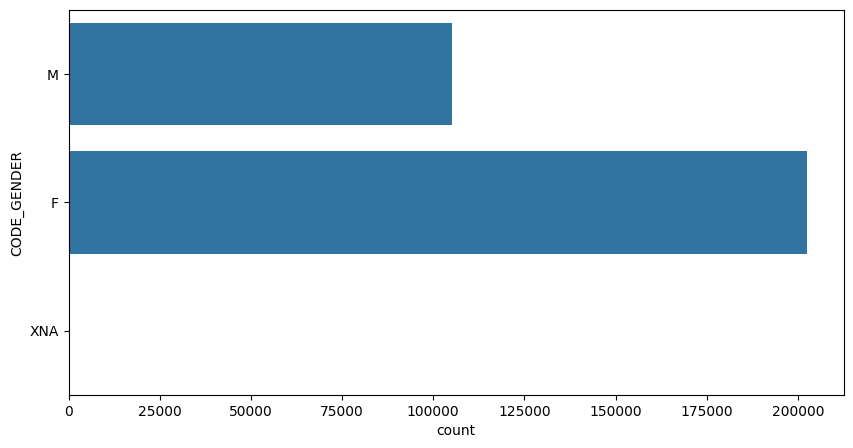

In [186]:
plt.figure(figsize=(10,5))
sns.countplot(y="CODE_GENDER",data=merged_data)

**XNA may be the client not want to show there gender or by mistake comapny miss during entering applying the application**

# NAME_TYPE_SUITE

**NAME_TYPE_SUITE**- who was accompanying client when he was applying for the loan

In [187]:
merged_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

Unaccompanied is containing higher values of loan applications

In [188]:
merged_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [189]:
merged_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

# NAME_CONTRACT_TYPE

**NAME_CONTRACT_TYPE**- indicates if loan is cash or revolving

In [190]:
merged_data['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [191]:
merged_data['NAME_FAMILY_STATUS'].isnull().sum()

0

In [192]:
merged_data['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

The column containing Unknown values we have replace it with Married 

In [193]:
# way to replace 'Unknown' with 'Married' in the 'NAME_FAMILY_STATUS' column
merged_data['NAME_FAMILY_STATUS'] = merged_data['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

# Display the value counts after replacement
print(merged_data['NAME_FAMILY_STATUS'].value_counts())

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64


Married people are those who apply most for the loan application for that we have replace with it

# NAME_HOUSING_TYPE

**NAME_HOUSING_TYPE**- housing situation of the client (renting, living with parents, ...)

In [194]:
merged_data['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

here we can say that the people who have there own house and apartment maybe they have taken loan for there house construsction  because of that House / apartment have higher majority of values containg 

# TARGET

In [195]:
merged_data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Text(0.5, 0, ' 0 ON TIME PAYMENT     ----       1 CLIENT WITH PAYMENT PROBLEMS')

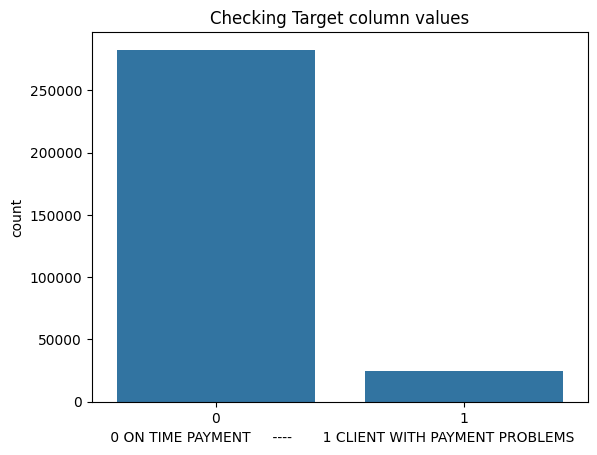

In [196]:
sns.countplot(x='TARGET',data=merged_data)
plt.title("Checking Target column values")
plt.xlabel(" 0 ON TIME PAYMENT     ----       1 CLIENT WITH PAYMENT PROBLEMS")

1. More clients have payments on time = 0
2. Clients have difficulties with there payments is low = 1

# Dtypes of Columns

In [197]:
print(type(merged_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 157 entries, SK_ID_CURR to YEAR_LAST_PHONE_CHANGE
dtypes: float64(87), int64(41), object(29)
memory usage: 368.3+ MB
<class 'NoneType'>


In [198]:
#show all columns that have a class of int64
merged_data.dtypes[merged_data.dtypes == 'int64']

SK_ID_CURR                     int64
TARGET                         int64
CNT_CHILDREN                   int64
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
FLAG_EMP_PHONE                 int64
FLAG_WORK_PHONE                int64
FLAG_CONT_MOBILE               int64
FLAG_PHONE                     int64
FLAG_EMAIL                     int64
REGION_RATING_CLIENT           int64
REGION_RATING_CLIENT_W_CITY    int64
HOUR_APPR_PROCESS_START        int64
REG_REGION_NOT_LIVE_REGION     int64
REG_REGION_NOT_WORK_REGION     int64
LIVE_REGION_NOT_WORK_REGION    int64
REG_CITY_NOT_LIVE_CITY         int64
REG_CITY_NOT_WORK_CITY         int64
LIVE_CITY_NOT_WORK_CITY        int64
FLAG_DOCUMENT_2                int64
FLAG_DOCUMENT_3                int64
FLAG_DOCUMENT_4                int64
FLAG_DOCUMENT_5                int64
FLAG_DOCUMENT_6                int64
FLAG_DOCUMENT_7                int64
F

In [199]:
#show all columns that have a class of int64
merged_data.dtypes[merged_data.dtypes == 'object']

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
OCCUPATION_TYPE                object
WEEKDAY_APPR_PROCESS_START     object
ORGANIZATION_TYPE              object
FONDKAPREMONT_MODE             object
HOUSETYPE_MODE                 object
WALLSMATERIAL_MODE             object
EMERGENCYSTATE_MODE            object
FLAG_LAST_APPL_PER_CONTRACT    object
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
NAME_PAYMENT_TYPE              object
CODE_REJECT_REASON             object
NAME_CLIENT_TYPE               object
NAME_GOODS_CATEGORY            object
NAME_PORTFOLIO                 object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
NAME_SELLER_

In [200]:
#show all columns that have a class of int64
merged_data.dtypes[merged_data.dtypes == 'float']

AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
REGION_POPULATION_RELATIVE    float64
                               ...   
YEARS_BIRTH                   float64
YEARS_EMPLOYED                float64
YEARS_REGISTRATION            float64
YEARS_ID_PUBLISH              float64
YEAR_LAST_PHONE_CHANGE        float64
Length: 87, dtype: object

# Columns Name

The keys() function in Python is used to get all the keys or column names from a dictionary or DataFrame. In this case, it is used to obtain the column names from the DataFrame null_values.

In [201]:
#Using keys() function: It will also give the columns of the dataframe.
print(null_values.keys())
print(len(null_values))

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'SK_ID_PREV', 'AMT_APPLICATION',
       'AMT_DOWN_PAYMENT', 'FLAG_LAST_APPL_PER_CONTRACT',
     

In [202]:
#finding "DESCRIBE","MEAN","MEDIAN","MODE" of null_values
print('describe:-',null_values.describe())
print('mean:-',null_values.mean())
print('mode:-',null_values.median())
print('median:-',null_values.mode())

describe:- count     70.000000
mean      76.439273
std       20.815773
min       50.176091
25%       56.914793
50%       68.909567
75%       99.998699
max      100.000000
dtype: float64
mean:- 76.4392725556391
mode:- 68.90956746262735
median:- 0    99.998699
dtype: float64


In [203]:
merged_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARS_LAST_PHONE_CHANGE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEAR_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,3.106849,25.920548,1.745205,9.994521,5.808219,3.106849
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,2.268493,45.931507,3.254795,3.249315,0.797260,2.268493
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,2.232877,52.180822,0.616438,11.671233,6.934247,2.232877
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,1.690411,52.068493,8.326027,26.939726,6.676712,1.690411
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,3.030137,54.608219,8.323288,11.810959,9.473973,3.030137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,0.747945,25.553425,0.646575,23.167123,5.430137,0.747945
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,0.000000,56.917808,1000.665753,12.021918,11.205479,0.000000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,5.230137,41.002740,21.701370,18.457534,14.109589,5.230137
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,NaN,0.882192,32.769863,13.112329,7.019178,2.550685,0.882192


# What Is a Default?
Default is the failure to make required interest or principal repayments on a debt

# What is Repayer
Loan repayment is the act of settling an amount borrowed from a lender along with the applicable interest amount

# UNIVARIATE ANALYSIS

In [204]:
# CREATING A FUNCTION TO AUTOMATE UNIVARIATE ANALYSIS PROCESS

def cat_uni_analyze(column_name, ylog=False, label_rotation=True, horizontal_layout=True):

    temp = merged_data[column_name].value_counts()
    df1 = pd.DataFrame({column_name: temp.index, 'Number of contracts': temp.values})

    # calculate the percentage of target=1 per category value
    cat_perc = merged_data[[column_name, 'TARGET']].groupby([column_name], as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"] * 100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 24))

    # Plot1: Count plot of categorical column
    s = sns.countplot(x=column_name, data=merged_data, hue="TARGET", order=cat_perc[column_name], palette=['b', 'r'], ax=ax1)

    # styling
    ax1.set_title(column_name, fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Orange'})
    ax1.legend(['Repayer', 'Defaulter'])

    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})
    if label_rotation:
        ax1.tick_params(axis='x', rotation=90)  # Rotating x-axis labels

    # plot2: Percentage of defaulters within the categorical column
    s = sns.barplot(x=column_name, y='TARGET', data=cat_perc, order=cat_perc[column_name], hue=column_name, palette='Set1', ax=ax2)
    if label_rotation:
        ax2.tick_params(axis='x', rotation=90)  # Rotating x-axis labels
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(column_name + " Defaulter %", fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Orange'})

    plt.show()


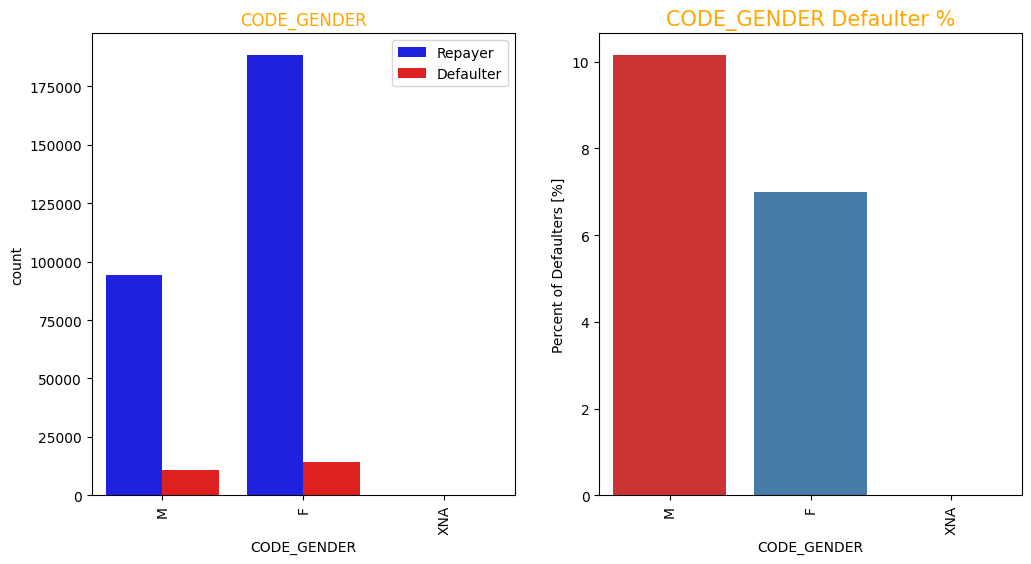

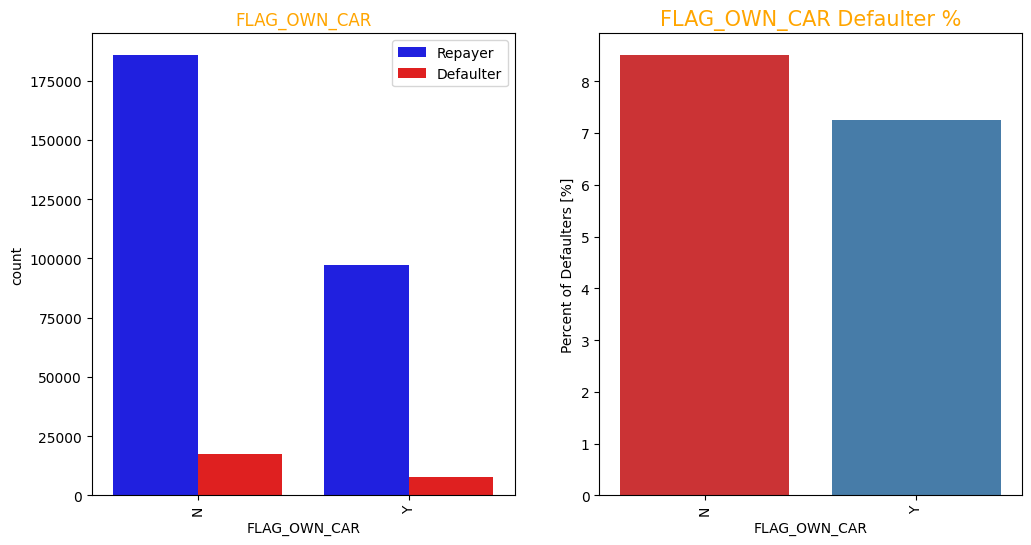

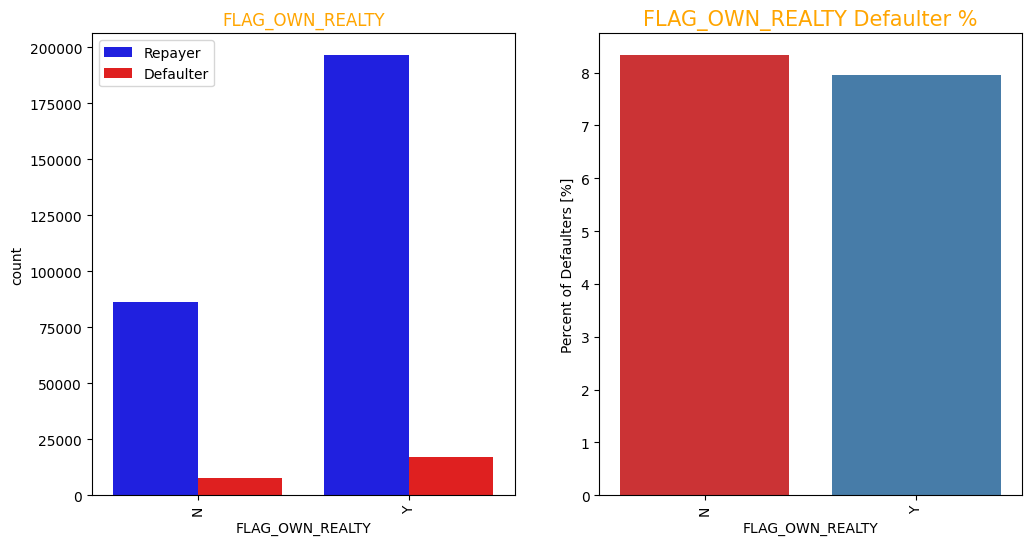

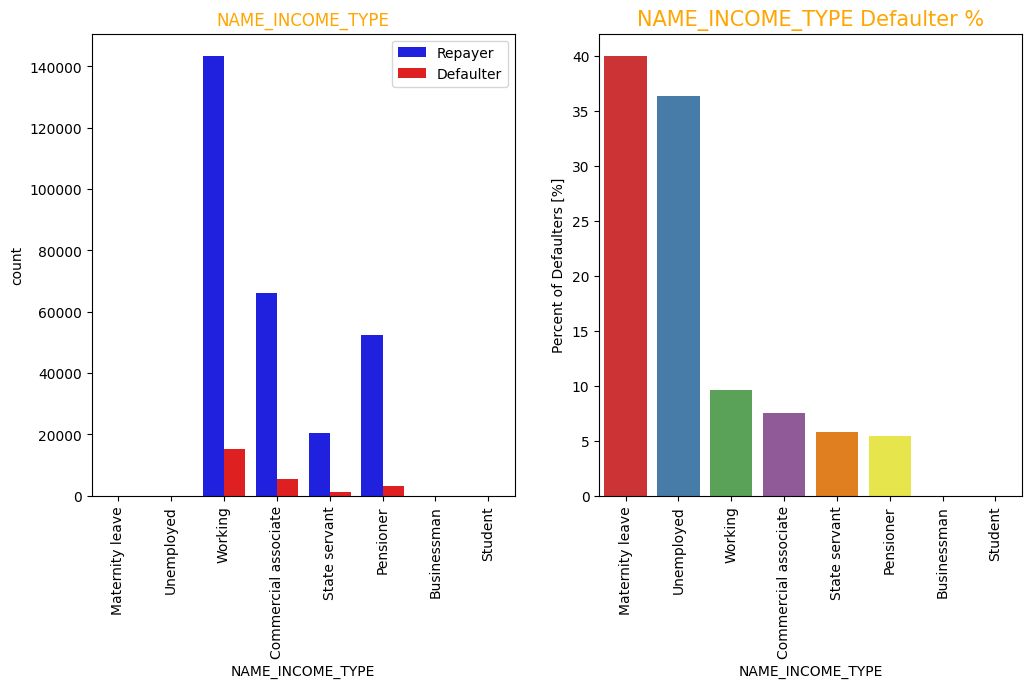

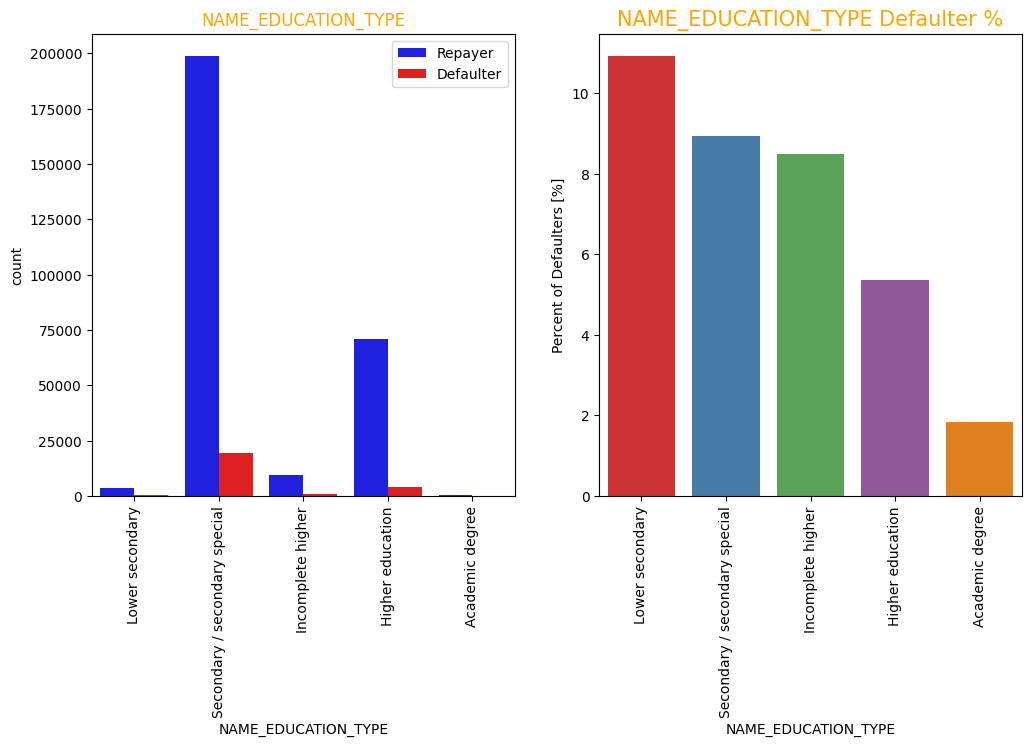

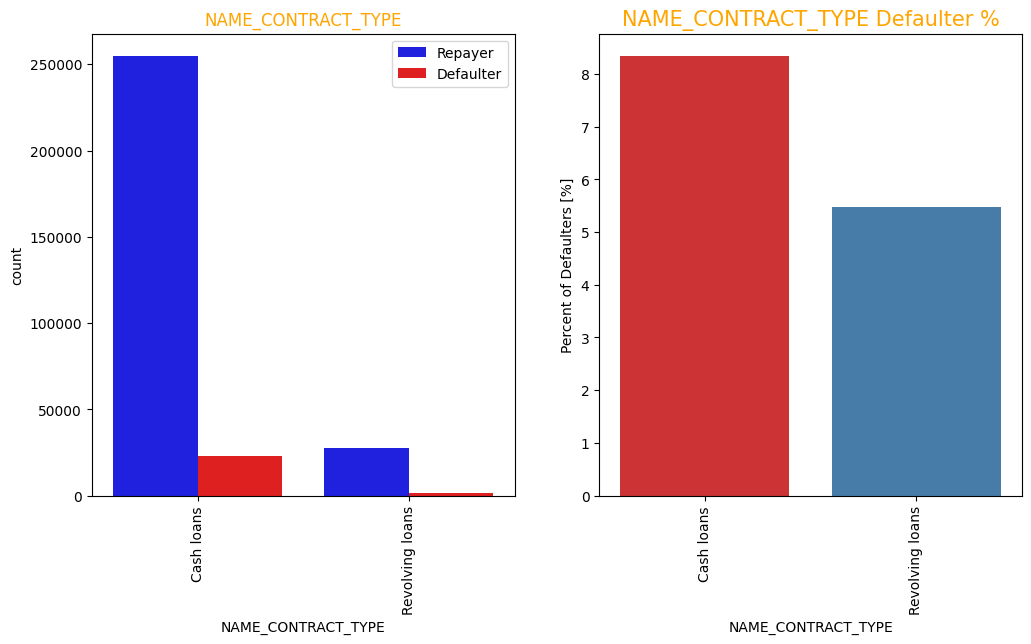

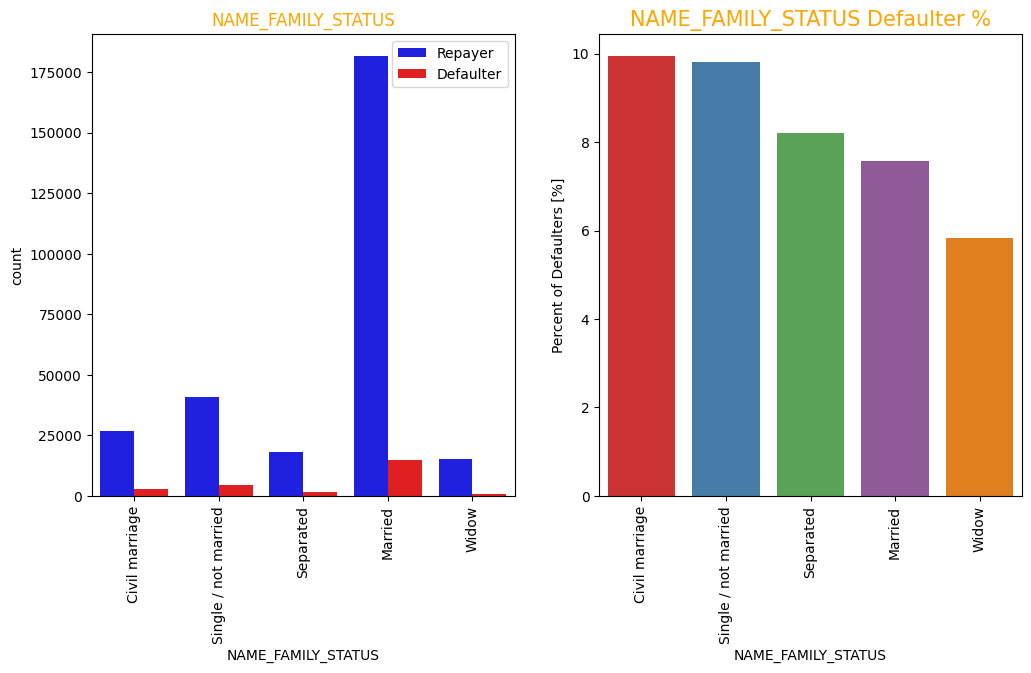

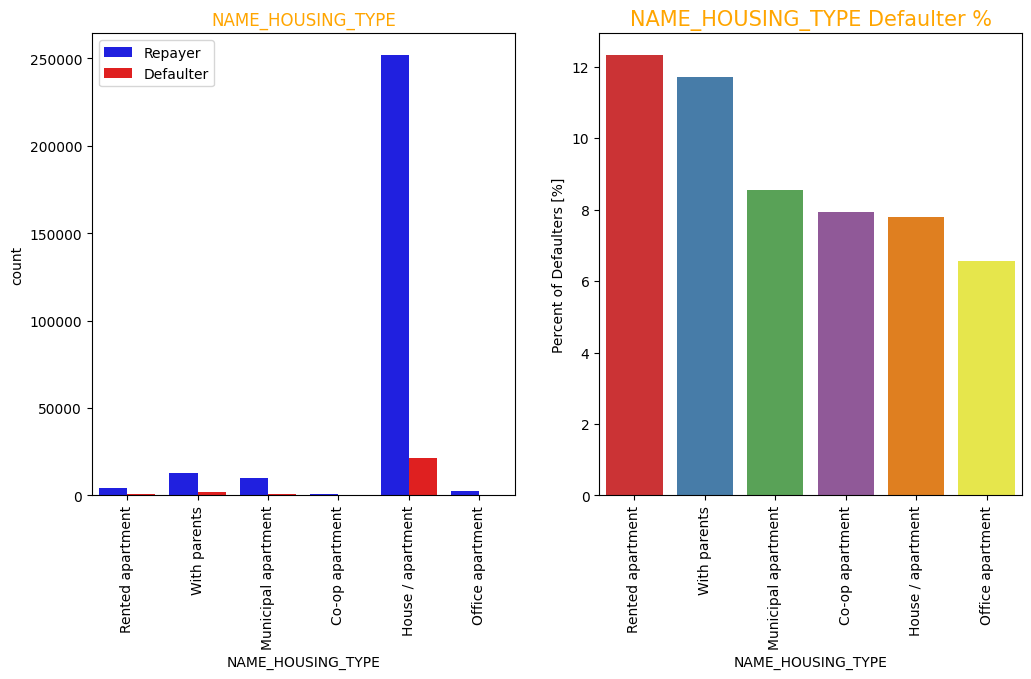

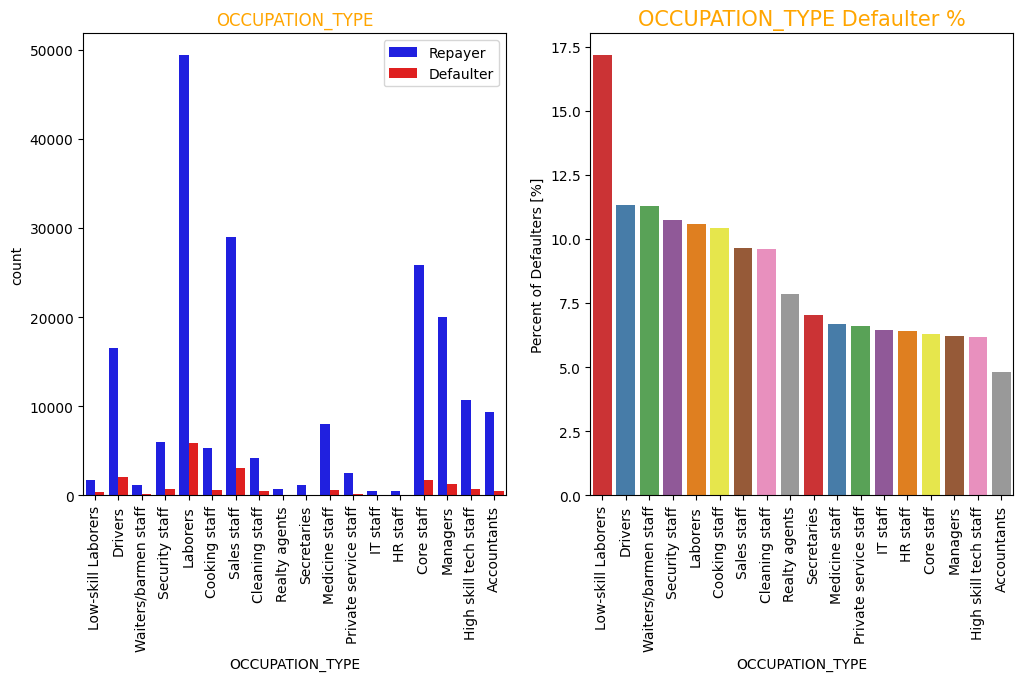

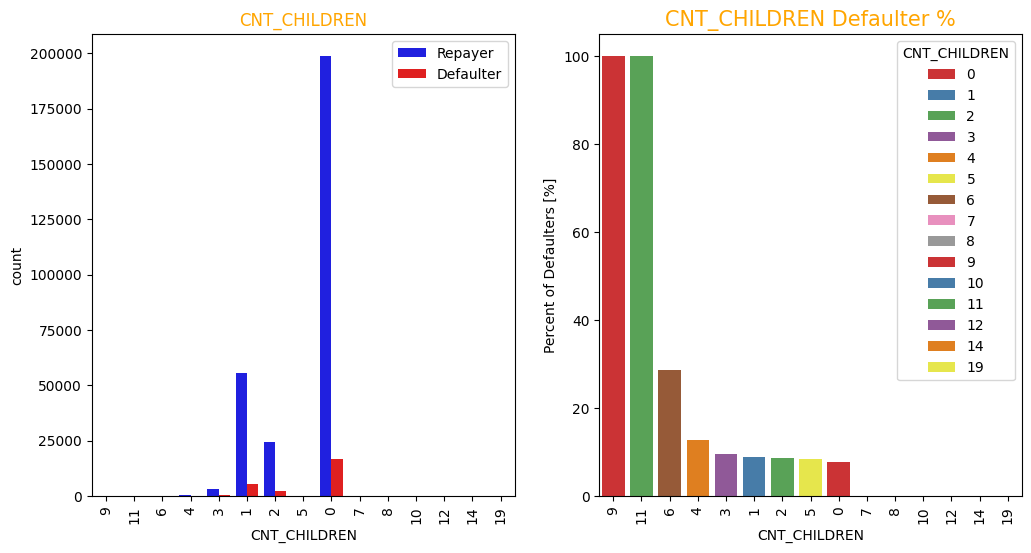

In [205]:
# UNIVARIATE ANALYSIS OF IMPORTANT COLUMNS

temp =['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','CNT_CHILDREN']

for i in temp:
    cat_uni_analyze(i)

UNIVARIATE CONCLUSIONS:

1. No. of female clients is almost double the amount of male clients, but males have a higher tendency to be defaulter.
2. client with a car are double than clients without a car but it doesnt make a difference in determining whether the client will repay or not.
3. client without real estate are double than clients with real estate but it doesnt make a difference in determining whether the client will repay or not.
4. Almost all clients with lower secondary education will end up as defaulter and almost all clients with academic degree will repay the loan.
5. More than 90% of the loans applications are in the form of cash loans.
6. Majority of the clients are married.
7. Clients with rented apartment are twice as more likely to end up as defaulter than clients with office apartments.
8. Labourers is the most common occupation type amongst applicants in this bank.
9. low-skilled labourers have the highest defaulter percentage amongst all other occupations, whereas accountants have the least.
10. clients with very low (0-1) children will most likely repay the loan.
11. Clients with high no. of children (6-11) will almost certainly end up as defaulter.

# BIVARIATE & MULTIVARIATE ANALYSIS

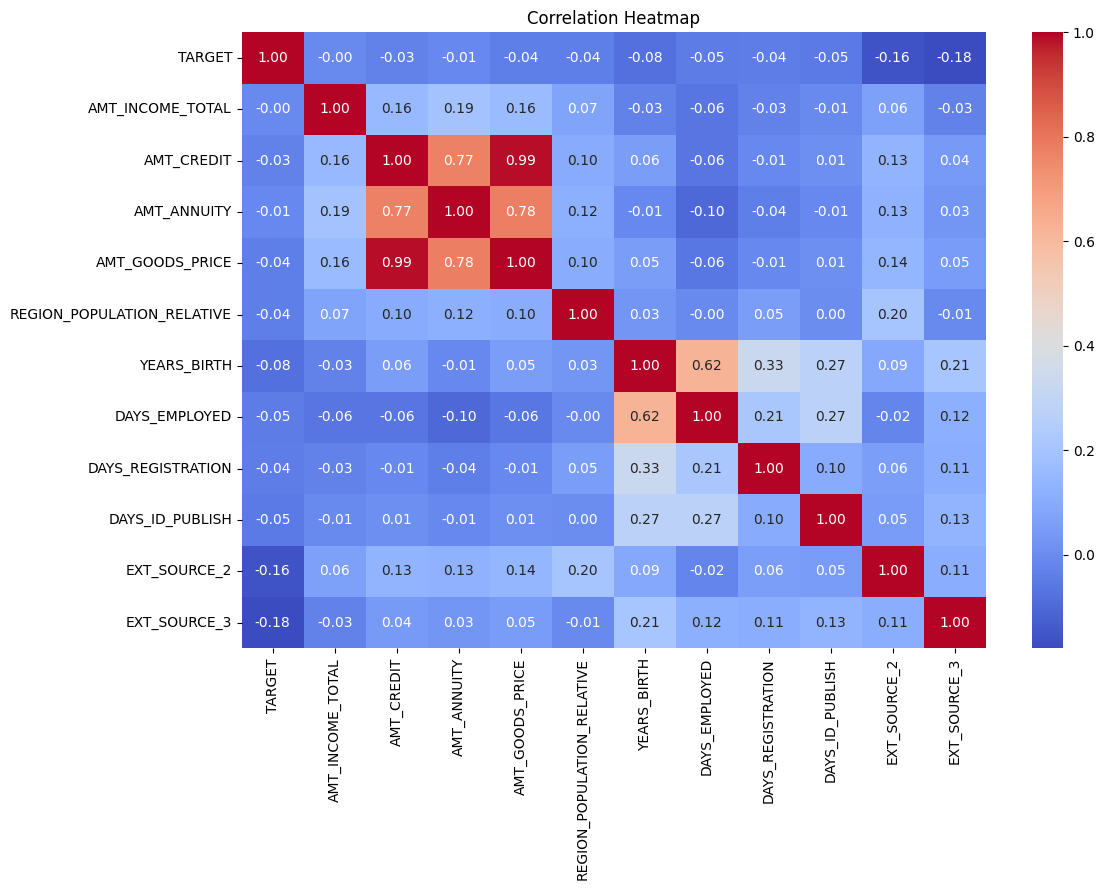

In [206]:
# HEAT MAP OF SOME IMPORTANT NUMERICAL COLUMNS

# select the numerical columns for the heatmap
numerical_columns = [
    'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

# create a correlation matrix
correlation_matrix = merged_data[numerical_columns].corr()

# create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. GOODS PRICE AND CREDIT AMOUTN HAVE A STRONG DIRECT RELATION.
2. NO. OF YEARS OF THE CLIENT SINCE BIRTH HAS A CONNECTION WITH THE NO. OF DAYS THAT THE CLIENT IS EMPLOYED.
3. ALSO, CREDIT AMOUNT HAS A DECENT CORRELATION WITH ANNUITY AMOUNT.
4. AND, GOODS PRICE HAS A CORRELATION WITH ANNYUITY AMOUNT.

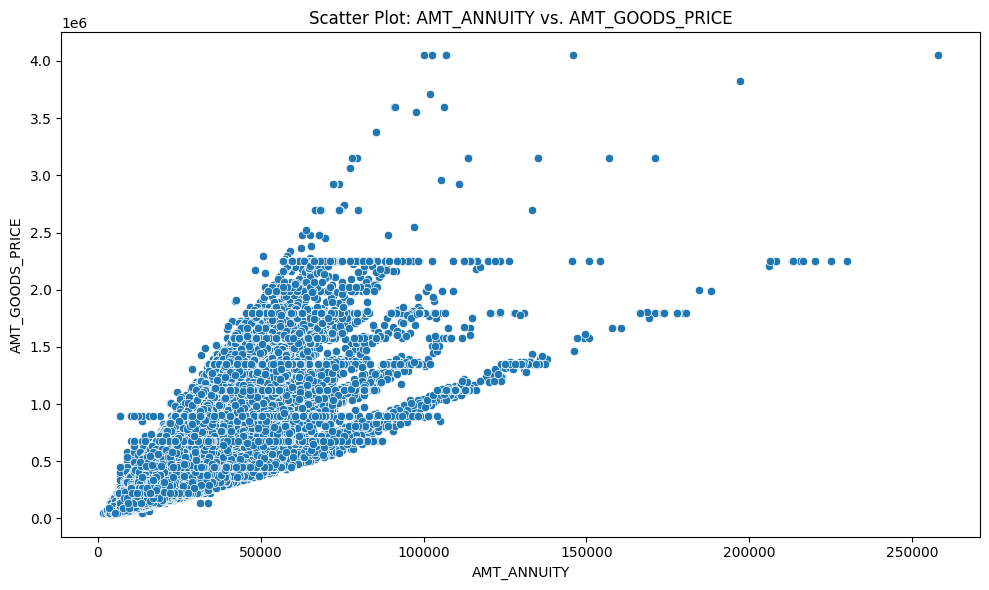

In [207]:
# SCATTER PLOT SHOWING AMT_ANNUITY VS AMT_GOODS_PRICE

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='AMT_ANNUITY', y='AMT_GOODS_PRICE')
plt.title('Scatter Plot: AMT_ANNUITY vs. AMT_GOODS_PRICE')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_GOODS_PRICE')
plt.tight_layout()
plt.show()

1. THERE IS A STRONG POSITIVE CORRELATION BETWEEN GOODS PRICE AND ANNUITY AMOUNT.
2. BOTH THE VARIABLES INCREASE WITH RESPECT TO THE OTHER.

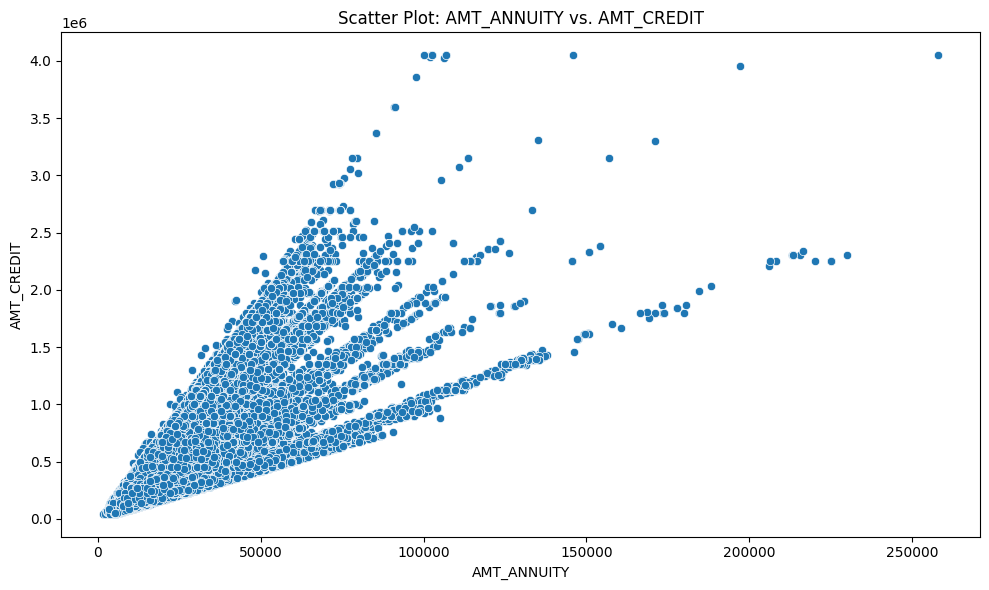

In [208]:
# SCATTER PLOT SHOWING AMT_ANNUITY VS AMT_CREDIT

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='AMT_ANNUITY', y='AMT_CREDIT')
plt.title('Scatter Plot: AMT_ANNUITY vs. AMT_CREDIT')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_CREDIT')
plt.tight_layout()
plt.show()

1. SIMILAR TO GOODS PRICE, ANNUITY AMOUNT ALSO HAS A STRONG CORRELATION WITH CREDIT AMOUNT.
2. CREDIT AMOUNT INCREASES AS ANNUITY AMOUNT INCREASES.

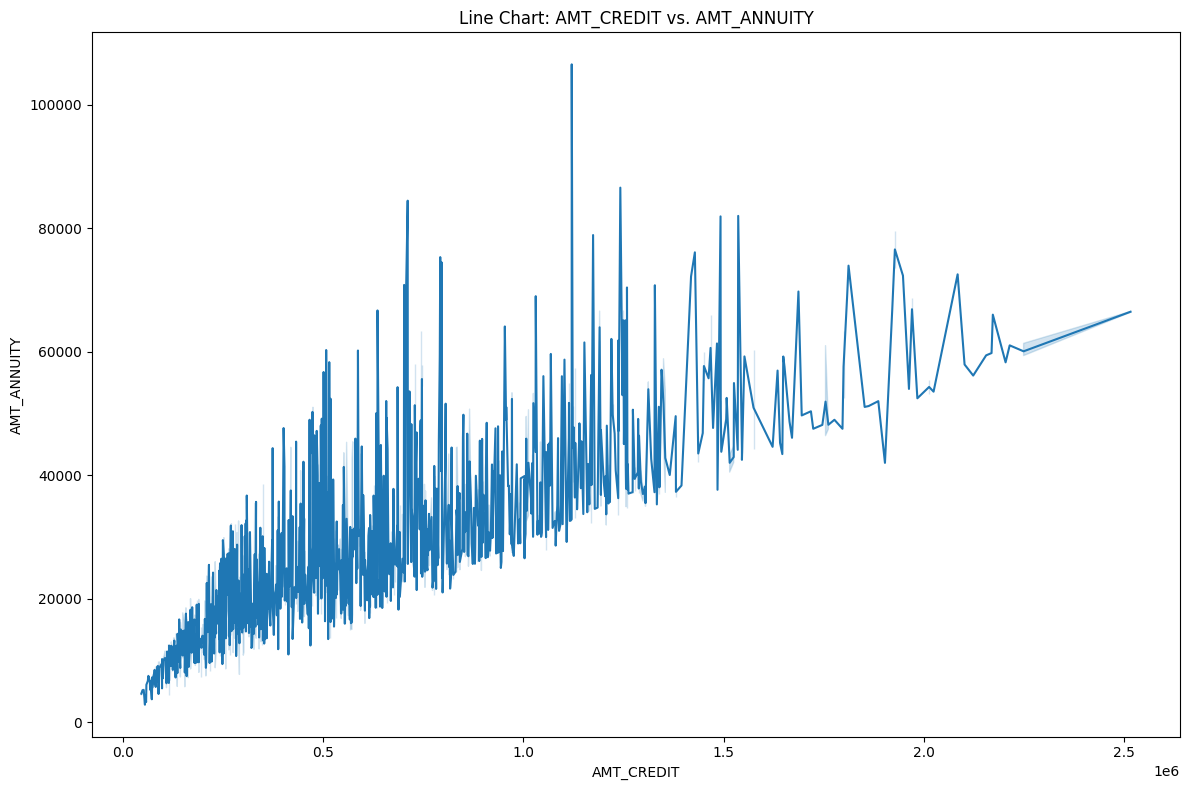

In [209]:
# LINE CHART BETWEEN AMT_CREDIT AND AMT_ANNUITY

sampled_data = merged_data.sample(frac=0.01)

plt.figure(figsize=(12, 8))
sns.lineplot(data=sampled_data, x='AMT_CREDIT', y='AMT_ANNUITY')
plt.title('Line Chart: AMT_CREDIT vs. AMT_ANNUITY')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.tight_layout()
plt.show()

1. WE CAN SEE THAT ANNUITY AMOUNT GOES UP AS CREDIT AMOUNT IS INCREASING.
2. ALSO, MAJORITY OF THE DATA POINTS ARE ON THE LEFT HALF.

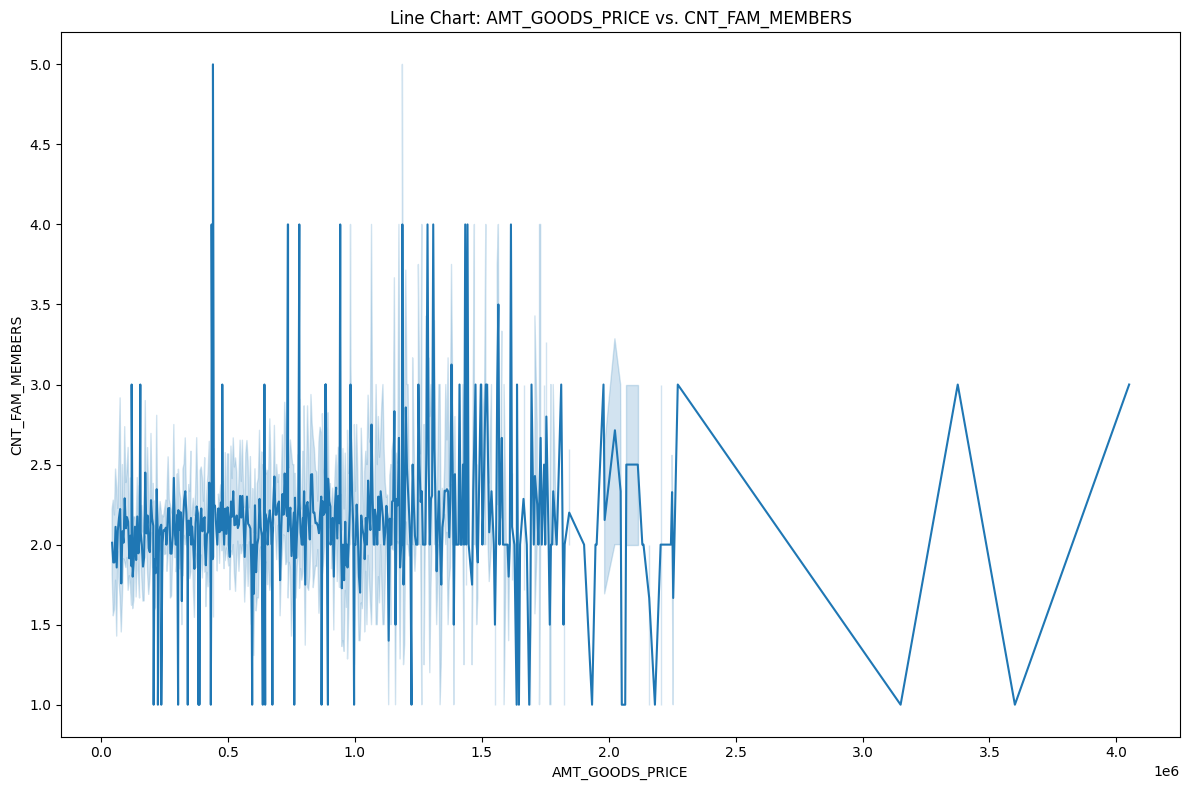

In [210]:
# LINE CHART BETWEEN AMT_GOODS_PREICE AND CNT_FAM_MEMBERS

sampled_data = merged_data.sample(frac=0.1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=sampled_data, x='AMT_GOODS_PRICE', y='CNT_FAM_MEMBERS')
plt.title('Line Chart: AMT_GOODS_PRICE vs. CNT_FAM_MEMBERS')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('CNT_FAM_MEMBERS')
plt.tight_layout()
plt.show()

1. THE CHART IS FAIRLY UNIFORM WITH ALMOST ALL DATA POINTS IN THE LEFT HALF OF THE CHART.

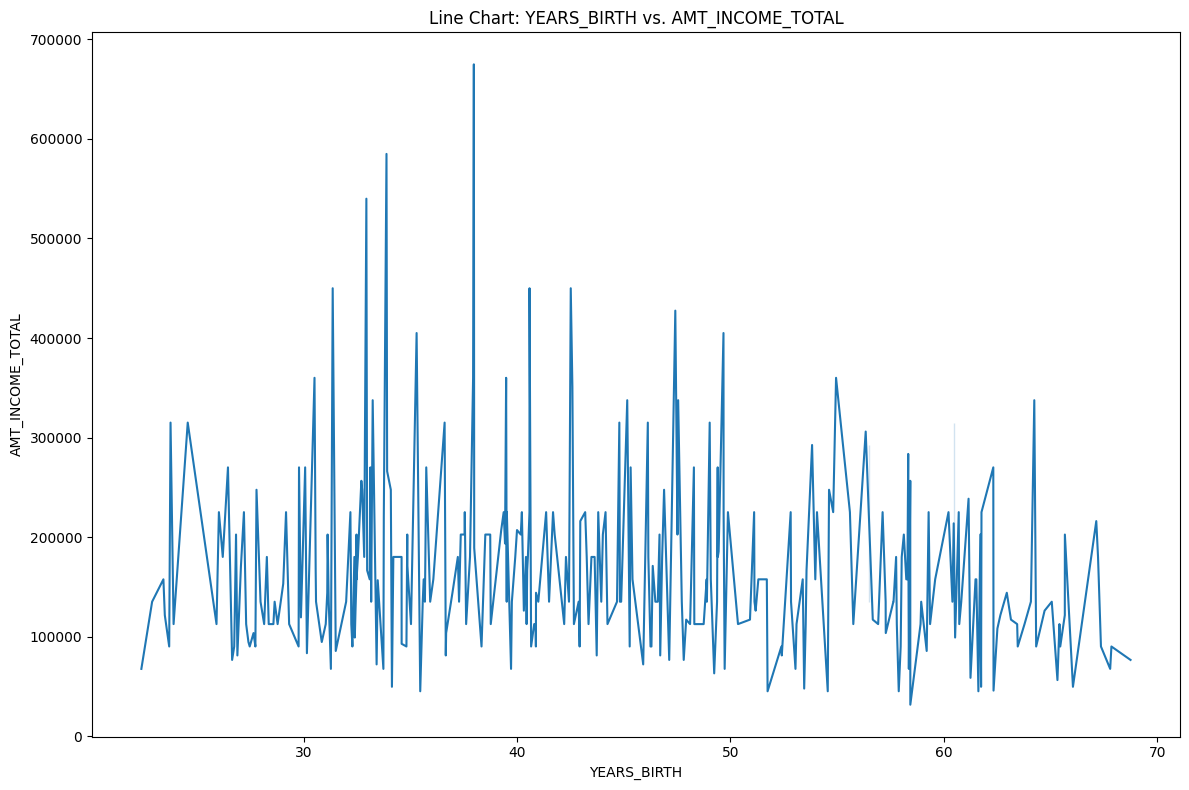

In [213]:
# LINE CHART BETWEEN YEARS_BIRTH AND AMT_INCOME_TOTAL

sampled_data = merged_data.sample(frac=0.001)

plt.figure(figsize=(12, 8))
sns.lineplot(data=sampled_data, x='YEARS_BIRTH', y='AMT_INCOME_TOTAL')
plt.title('Line Chart: YEARS_BIRTH vs. AMT_INCOME_TOTAL')
plt.xlabel('YEARS_BIRTH')
plt.ylabel('AMT_INCOME_TOTAL')
plt.tight_layout()
plt.show()

1. WE CAN SEE THAT INCOME AMOUNT IS DISTRIBUTED EQUALLY THROUGHOUT THE AGES.
2. THERE IS A SLIGHT INCREASE IN INCOME AMOUNT FOR AGES 30-40.

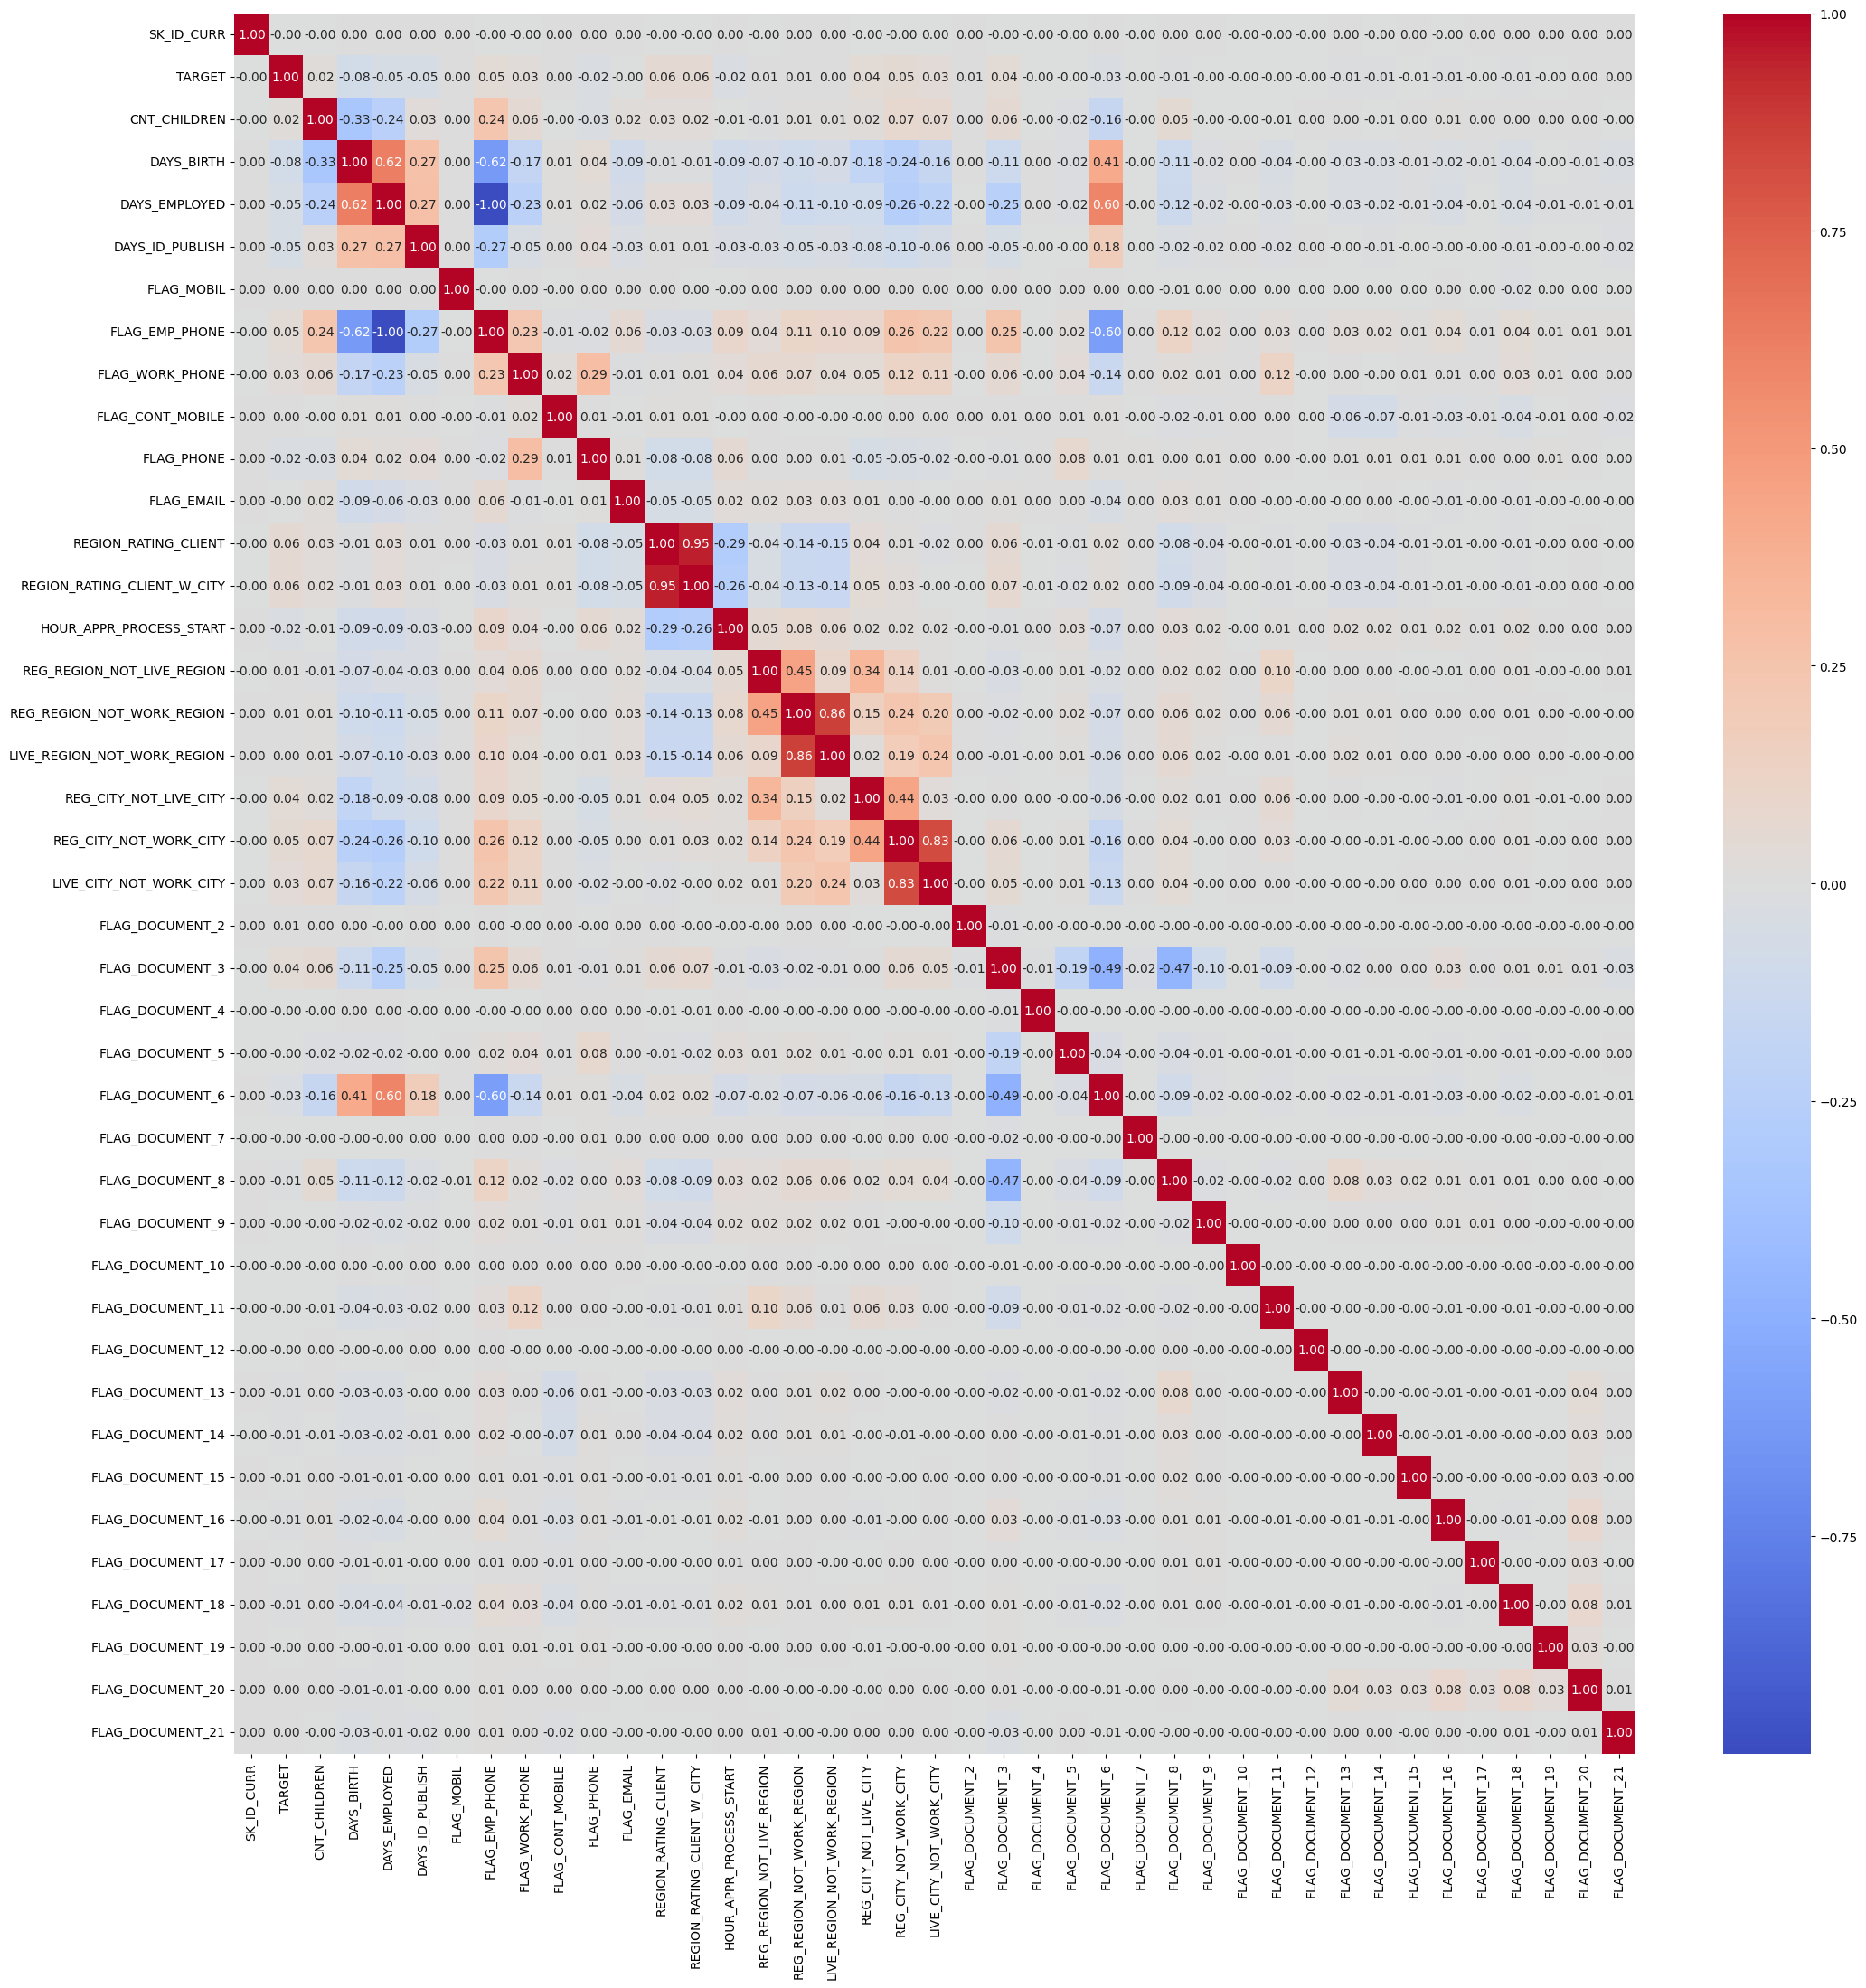

In [212]:
# HEATMAP OF ALL THE INTEGER VALUED COLUMNS IN THE DATASET

int_columns = merged_data.select_dtypes(include=["int64"]).corr()
plt.figure(figsize = (25,25))
sns.heatmap(int_columns, annot = True, cmap = "coolwarm", fmt='.2f')
plt.show()

1. MOST CLIENTS HAVE REGISTERED FROM THE CITY THAT THEY LIVE IN.
2. MOST CLIENTS HAVE REGISTERED FORM THE REGION THEY LIVE IN.

**FINAL CONCLUSIONS:**


CLIENTS TO ACCEPT:
1. HAVING AN ACADEMIC DEGREE
2. HAVING A HIGH PAYING JOB (ACCOUNTANTS, PRIVATE SERVICE STAFF)
3. WHO HAVE NO CHILDREN OR VERY FEW CHILDREN (0-1)
4. WITH THE AGE OF BETWEEN 30-50 YEARS
5. FEMALE CLIENTS SHOULD BE GIVEN SLIGHT PREFERENCE OVER MALE CLIENTS
6. RESIDE IN AN OFFICE APARTMENT

CLIENTS TO REJECT:
1. WHO HAVE LOW-SKILLED LABOURER AS THE OCCUPATION
2. WITH A HIGH CHILD COUNT (6-12)
3. RESIDE IN RENTED APARTMENTS
4. WHO HAVE A HIGH FAMILY MEMBER COUNT
5. YOUNG CLIENTS (LESS THAN 25 YEARS OF AGE)
6. OLD CLIENTS (MORE THAN 62 YEARS OF AGE)
7. WHO HAVE A LOWER-SECONDARY EDUCATION ONLY (OR LESSER THAN THAT)**